In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras.models import Sequential

2025-03-20 20:06:26.047413: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Load and prepare the MNIST data set and convert teh sample data from integers to floating point numbers

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
num_classes = 10
y_train =  tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
y_train.shape

(60000, 10)

In [7]:
### Build the Machine Learning Model

#### Build tf.keras.sequential model by stacking layers

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Softmax())
model.add(Dense(10))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### tf.nn.softmax function converts these logits to probabilities for each class

In [10]:
loss_fn = tf.keras.losses.MeanSquaredError()

In [11]:
model.compile(optimizer= 'adam', loss=loss_fn, metrics=['accuracy'])

### Train and evaluate the model

#### Use model.fit method to adjust the model parameters and minimise the loss

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.2178 - loss: 0.0859
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.3117 - loss: 0.0748
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3581 - loss: 0.0710
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3593 - loss: 0.0694
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.3719 - loss: 0.0682


In [14]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.4244 - loss: 0.0629


[0.06288282573223114, 0.4244000017642975]

In [15]:
predY = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
 predY.shape

(10000, 10)

In [17]:
predY[0,:]

array([ 1.4325548e-03, -3.8445443e-03,  1.0086216e-02,  6.7221262e-03,
        8.7550282e-04, -5.7531768e-03,  2.4654493e-03,  8.8063753e-01,
        3.1904466e-03,  9.1171674e-02], dtype=float32)

In [18]:
classLabel = tf.argmax(predY,1)

In [19]:
out = classLabel.numpy()

In [20]:
out[0]

7

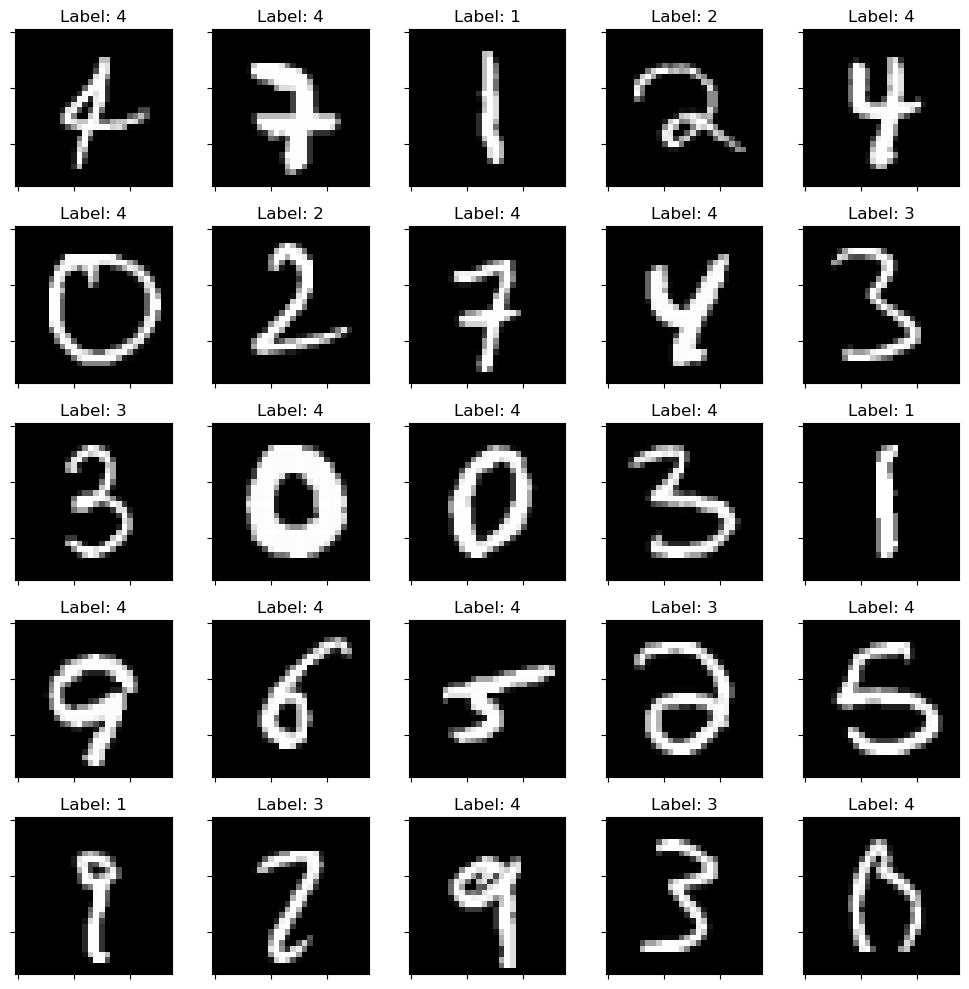

In [21]:
from tensorflow.python.ops.check_ops import NUMERIC_TYPES
from tensorflow.python.ops.script_ops import numpy_function
from matplotlib import pyplot as plt


startIdx = 300
numRows = 5
numCols = 5
fig, axes = plt.subplots(numRows, numCols, figsize=(2*numCols,2*numRows))
for i in range(25):
    ax = axes[i//numCols, i%numCols]
    ax.imshow(x_test[i+startIdx,::], cmap='grey')
    ax.set_title('Label: {}'.format(classLabel[i+startIdx]))
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)

plt.tight_layout()
plt.show()